In [1]:
import numpy as np
import tensorflow as tf

#This should be the first statement when running tf.eager
tf.enable_eager_execution()

In [2]:
# This is necessary for reproducibility!
tf.set_random_seed(42)

Define input data and ground truth labels

In [3]:
X = np.asarray(dtype=np.float32, a=[[0,0], [1,0], [0,1], [1,1]])
Y = np.expand_dims(np.asarray(dtype=np.float32, a=[0., 1., 1., 0.]), axis=-1)

In [4]:
class LinearXORModel(tf.keras.Model):
    def __init__(self):
        super(LinearXORModel, self).__init__()
        #Let us add a *linear* hidden layer
        self.f1 = tf.keras.layers.Dense(units=2, kernel_initializer='random_normal', activation='relu', bias_initializer='uniform')
        self.f2 = tf.keras.layers.Dense(units=1, kernel_initializer='random_normal')
        
    def call(self, inputs):
        h = self.f1(inputs)
        return self.f2(h)

In [5]:
model = LinearXORModel()

In [6]:
model(tf.convert_to_tensor(X))

<tf.Tensor: id=57, shape=(4, 1), dtype=float32, numpy=
array([[-0.64365935],
       [-0.56768495],
       [-0.5631927 ],
       [-0.7462795 ]], dtype=float32)>

In [7]:
def loss(model, X, Y):
  predictions = model(X)
  return tf.losses.mean_squared_error(labels=tf.convert_to_tensor(Y), predictions=predictions)

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.002)

In [9]:
for step in range(20000):
  # Calculate derivatives of the input function with respect to its parameters.
  grads = grad(model, X, Y)
  # Apply the gradient to the model
  optimizer.apply_gradients(zip(grads, model.variables), global_step=tf.train.get_or_create_global_step())
  if step % 1000 == 0:
    print("Loss at step {:04d}: {:.3f}".format(step, loss(model, X, Y)))

print("Final loss: {:.3f}".format(loss(model, X, Y)))

Loss at step 0000: 1.442
Loss at step 1000: 0.181
Loss at step 2000: 0.164
Loss at step 3000: 0.151
Loss at step 4000: 0.139
Loss at step 5000: 0.123
Loss at step 6000: 0.105
Loss at step 7000: 0.086
Loss at step 8000: 0.067
Loss at step 9000: 0.051
Loss at step 10000: 0.037
Loss at step 11000: 0.025
Loss at step 12000: 0.017
Loss at step 13000: 0.010
Loss at step 14000: 0.005
Loss at step 15000: 0.003
Loss at step 16000: 0.001
Loss at step 17000: 0.001
Loss at step 18000: 0.000
Loss at step 19000: 0.000
Final loss: 0.000


In [10]:
model(X)

<tf.Tensor: id=1800882, shape=(4, 1), dtype=float32, numpy=
array([[0.00144255],
       [0.9935096 ],
       [0.99350923],
       [0.00854647]], dtype=float32)>

In [ ]:
#Hidden representations learn to map input to linearly separable points

In [11]:
h = model.f1(X).numpy()
print(h)

[[0.        1.1912402]
 [0.6890116 0.       ]
 [0.6890119 0.       ]
 [1.5744605 0.       ]]


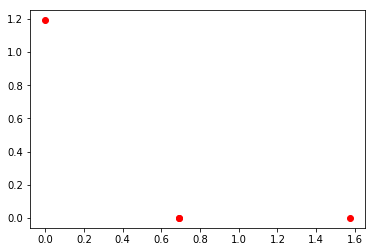

In [12]:
import matplotlib.pyplot as plt
plt.plot(h[:,0], h[:,1], 'ro')